Benoit's version:
## PAP Model
To do:
x Draw the 3D mac graph
* Make the iterations code Figure 2 and Figure 3 in Matlab

In [16]:
#import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ZAF as zaf
import CalcI_file
from CalcI_file import CalcI
from matplotlib import cm
# to display dataframes
from tabulate import tabulate

# INPUTS
# concentration
# Indices in Python start at 0
element_indices = np.array([11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15, 56, 28, 9, 17]) # atomic numbers
element_indices = element_indices - 1 # python start at zero
# 
Cel = np.zeros((1,92))
np.put(Cel, element_indices, [8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])

# importing all elements with their atomic number, atomic weights and density
elements_df = zaf.get_element([])
# importing all the macs
# mac_df = pd.read_csv("Henke 1993_modified.txt")
mac_df = pd.read_csv("MAC30.txt")
print(elements_df)
# converting element_df into a numpy Z,A,Density
A_np = np.zeros((1,92))
Z_np = np.zeros((1,92))
density_np = np.zeros((1,92))
for i in range(0,92): # element zAbs
        A_np[0,i] = elements_df[['molar_mass','element']].to_numpy()[i,0]
        Z_np[0,i] = elements_df[['atomic_number','element']].to_numpy()[i,0]
        density_np[0,i] = elements_df[['density','element']].to_numpy()[i,0]


    atomic_number element  molar_mass    density
0               1       H      1.0078   0.000090
1               2      He      4.0026   0.000179
2               3      Li      6.9400   0.534000
3               4      Be      9.0122   1.850000
4               5       B     10.8100   2.340000
..            ...     ...         ...        ...
93             94      Pu    239.0520  19.816000
94             95      Am    243.0000  12.000000
95             96      Cm    247.0000  13.510000
96             97      Bk    247.0000  14.780000
97             98      Cf    251.0000  15.100000

[98 rows x 4 columns]


In [17]:
# EXTRACTING THE MACKALPHA...
## MACKalpha
MACKalpha = mac_df[['zAbs', 'zMes','Ka']]
MACKbeta = mac_df[['zAbs', 'zMes', 'Kb']]
MACLalpha = mac_df[['zAbs', 'zMes', 'La']]
MACLbeta = mac_df[['zAbs', 'zMes', 'Lb']]
MACLl = mac_df[['zAbs', 'zMes', 'Ll']]
MACMa = mac_df[['zAbs', 'zMes', 'Ma']]
MACMb = mac_df[['zAbs', 'zMes', 'Mb']]

# reorganizing the matrix to have 92x92
MACKalpha_np_indices = MACKalpha.to_numpy()
MACKbeta_np_indices = MACKbeta.to_numpy()
MACLalpha_np_indices = MACLalpha.to_numpy()
MACLbeta_np_indices = MACLbeta.to_numpy()
MACLl_np_indices = MACLl.to_numpy()
MACMa_np_indices = MACMa.to_numpy()
MACMb_np_indices = MACMb.to_numpy()

# MAC Matrices
MACKalpha_np = np.zeros((92,92))
MACKbeta_np = np.zeros((92,92))
MACLalpha_np = np.zeros((92,92))
MACLbeta_np = np.zeros((92,92))
MACLl_np = np.zeros((92,92))
MACMa_np = np.zeros((92,92))
MACMb_np = np.zeros((92,92))

for i in range(0,92): # element zAbs
    for j in range(1,93): # element zMes
        MACKalpha_np[i,j-1] = MACKalpha_np_indices[(j-1) + 92 * i,2]
        MACKbeta_np[i,j-1] = MACKbeta_np_indices[(j-1) + 92*i, 2]
        MACLalpha_np[i,j-1] = MACLalpha_np_indices[(j-1) + 92*i, 2]
        MACLbeta_np[i,j-1] = MACLbeta_np_indices[(j-1) + 92*i, 2]
        MACLl_np[i,j-1] = MACLl_np_indices[(j-1) + 92*i, 2]
        MACMa_np[i,j-1] = MACMa_np_indices[(j-1) + 92*i, 2]
        MACMb_np[i,j-1] = MACMb_np_indices[(j-1) + 92*i, 2]

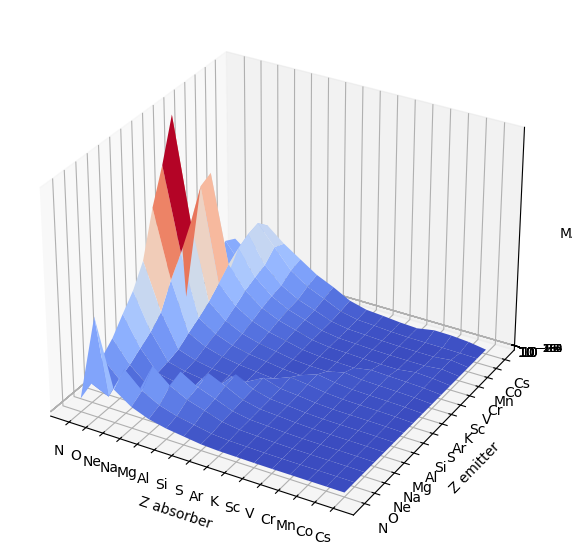

In [18]:
from mpl_toolkits.mplot3d import Axes3D

Meas_El = [10, 18, 19, 21, 24, 25, 23, 7, 13, 12, 11, 14, 55, 27, 8, 16]  # length 16
Meas_Elsort = sorted(Meas_El)
NameEl = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U']

nMsEl = len(Meas_Elsort)

# Assuming MACkalpha is a 2D numpy array
MACkalpha_Ms = MACKalpha_np[np.ix_(np.array(Meas_Elsort)-1, np.array(Meas_Elsort)-1)]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(nMsEl), np.arange(nMsEl))
ax.plot_surface(X, Y, MACkalpha_Ms, cmap=cm.coolwarm)

ax.set_xticks(np.arange(nMsEl))
ax.set_yticks(np.arange(nMsEl))

ax.set_xticklabels([NameEl[i-1] for i in Meas_Elsort])  # Python indexing starts at 0
ax.set_yticklabels([NameEl[i-1] for i in Meas_Elsort])  # Python indexing starts at 0

ax.set_zscale('log')

ax.set_xlabel('Z absorber')
ax.set_ylabel('Z emitter')
ax.set_zlabel('MAC')

plt.show()



In [19]:
# importing the global variable in the module
eps = 3 * 2.2204e-16
CalcI_file.A_np = A_np
CalcI_file.Z_np = Z_np
CalcI_file.MeasuredEl = (Cel > eps)[0]
# CalcI_file.element_indices = element_indices
"""
    @ should be changed you are not dealing with K lines
"""
Eo = 15 # keV
Cel = Cel/100 # converting weigth percentage to percentage O.XX
# checked with data of benoit
# import scipy.io
# MACKalpha_b = scipy.io.loadmat('MACKalpha_benoit.mat')
# MACKalpha_b = MACKalpha_b['MAC']
# print(MACKalpha_b)
# print(MACKalpha_b[3,14])
# print(MACKalpha_b)
""" Cel is the Std_AtWtPc """
# print(CalcI(Cel,Eo,MACKalpha_np)) # verified gives the same result like the benoit!

' Cel is the Std_AtWtPc '

KeyError: "None of [Int64Index([7, 11, 13], dtype='int64', name='element')] are in the [columns]"

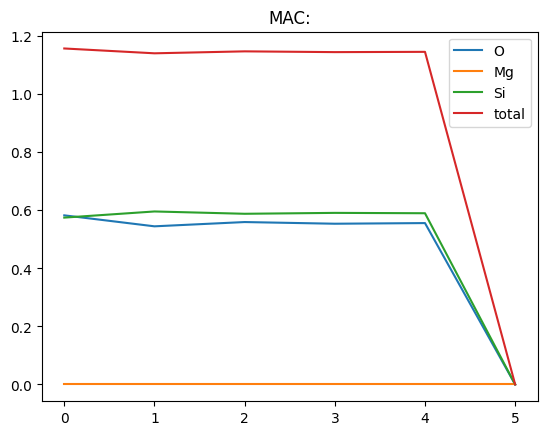

In [26]:
# regression
# number of standards
nStd = 1

# standards weight fractions
element_indices = np.array([11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15, 56, 28, 9, 17]) # atomic numbers
element_indices = element_indices - 1 
""" @Standard composition (At. wt. %) - ! should convert!!!!!! """
Std_AtWtPc = np.zeros((nStd,92))
np.put(Std_AtWtPc,element_indices,[8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])

# python start at zero
# 
# Cel = np.zeros((1,92))
# np.put(Cel, element_indices, [8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])
# Cstd = Std_AtWtPc/100 already divided by 100 when assigning
""" Should we divid by 100 or not!? """
Cstd = Std_AtWtPc/100 
IntPAPstd = np.zeros((nStd, 92))
# standard intensity PAP 
""" IntPAPstd seems to give the same result as benoit code """
for i in range(nStd):
    IntPAPstd[i,:] = CalcI(Std_AtWtPc/100, Eo, MACKalpha_np)

# Intensities
element_indices_intensities = np.array([11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15]) # atomic numbers
element_indices_intensities = element_indices_intensities - 1
""" Isp & Istd seems to be correct """
Isp = np.zeros((1,92))
Istd = np.zeros((1,92))

np.put(Istd, element_indices_intensities, [120.5,161.2,244.1,683.4,156.6,326,280.6,156.6,381.9,142.2,255.8,0]) # checked
np.put(Isp, element_indices_intensities, [-0.1391,-0.2086, -0.2483, -0.2583,-0.1291, -0.1490, -0.0993, 155.9192, 741.2866,-0.2086, 0.0397, 0.0000]) # checked

# remove negative values 
Istd[Istd < 0] = 0
Isp[Isp < 0] = 0

# k ratios
KRatiosMsrd = (Isp/Istd) # checked
""" This part of the code wasn't added """
# KRatiosMsrdNorm = KRatiosMsrd;
# KRatiosMsrdNorm(KRatiosMsrdNorm~=KRatiosMsrdNorm) = 0; % to remove NaN values
# KRatiosMsrdNorm = KRatiosMsrdNorm ./ repmat(sum(KRatiosMsrdNorm,2),1,92); % normalize
# KRatiosMsrdNorm(Isp~=Isp) = NaN;
""" END """
""" Cstd is different from benoit, mine should be correct because his change the values after assigning StdAtWt to Cstd"""
Csp_i = (Isp/Istd) * Cstd # Castaing's first approximation

##
np.nan_to_num(Csp_i, copy=False, nan=0, posinf=0, neginf=0)
#
ntests = 5
j = 0
IntPaPsp_t = np.zeros((ntests, 92))
KRatiosMdl = IntPaPsp_t
KRatiosMdlNorm = IntPaPsp_t

Csps = np.zeros((ntests+1, 92))
Csp_t = Csp_i
Csps[0,:] = Csp_t
""""""""""""""""""""" VERIFIED UNTIL HERE """""""""""""""""""""

for i in range(ntests):
    #Csp_t[Csp_t < 0] = 0
    ##
    IntPaPsp_t[i,:] = CalcI(Csp_t, Eo, MACKalpha_np)
    IntRatio = IntPaPsp_t[i,:]/IntPAPstd[j,:]
    sumKmdl = sum(IntRatio[IntRatio > 0])
    sumKmsrd = sum(KRatiosMsrd[KRatiosMsrd > 0])
    rat = sumKmsrd/sumKmdl
    Csp_t = Csp_t * KRatiosMsrd/(IntRatio * rat)
    np.nan_to_num(Csp_t, copy=False, nan=0, neginf=0, posinf=0)
    KRatiosMdl = IntRatio * rat
    Csps[i,:] = Csp_t

df = pd.DataFrame(Csps, columns=elements_df.element[elements_df.index < 92])

print(df[df != 0])

# Assuming Csps, KRatiosMdl, KRatiosMsrd, j, and Macfilename are defined
Tot = np.nansum(Csps, axis=1)

plt.figure()
plt.plot(Csps[:, [7, 11, 13]])  # Python indexing starts at 0
plt.plot(Tot)
plt.legend(['O', 'Mg', 'Si', 'total'])
plt.title(f'MAC:')

whichEl = [7, 11, 13]  # Python indexing starts at 0
nselecEl = len(whichEl)
# print(KRatiosMdl)
# print('---------------------------------------------------')
# print(KRatiosMsrd)
Kdiv = KRatiosMdl[whichEl] / KRatiosMsrd[j, whichEl]

plt.figure()
plt.plot(Kdiv)
# print(Kdiv)
plt.legend([NameEl[i] for i in whichEl])
plt.ylabel('Kmodel / Kmeasured')
plt.xlabel('iteration')

plt.show()

# print(IntPaPsp_t)
# print('#########################################################')
# print(Csps)